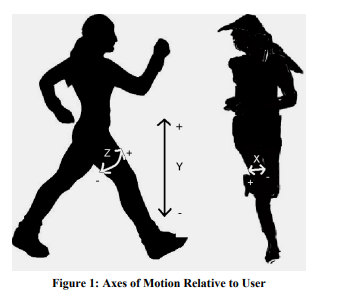

# import modules

In [1]:
from lib.preprocess import load_data
from lib.local_utils import n_plot_activity, plot_activity
import copy
import numpy as np
from scipy.fft import fft, ifft

# load data

In [2]:
# Same labels will be reused throughout the program
LABELS = ["Downstairs", "Jogging", "Sitting", "Standing", "Upstairs", "Walking"]
# The number of steps within one time segment
TIME_PERIODS = 80
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 40
# x, y, z acceleration as features
N_FEATURES = 3
# Define column name of the label vector
LABEL = "ActivityEncoded"
# set random seed
SEED = 314

SAMPLING_RATE = 20

x_train, x_test, y_train, y_test = load_data(
    LABELS, TIME_PERIODS, STEP_DISTANCE, LABEL, N_FEATURES, SEED
)

In [3]:
idx = 1

In [4]:
LABELS[np.argmax(y_train[idx])]

'Walking'

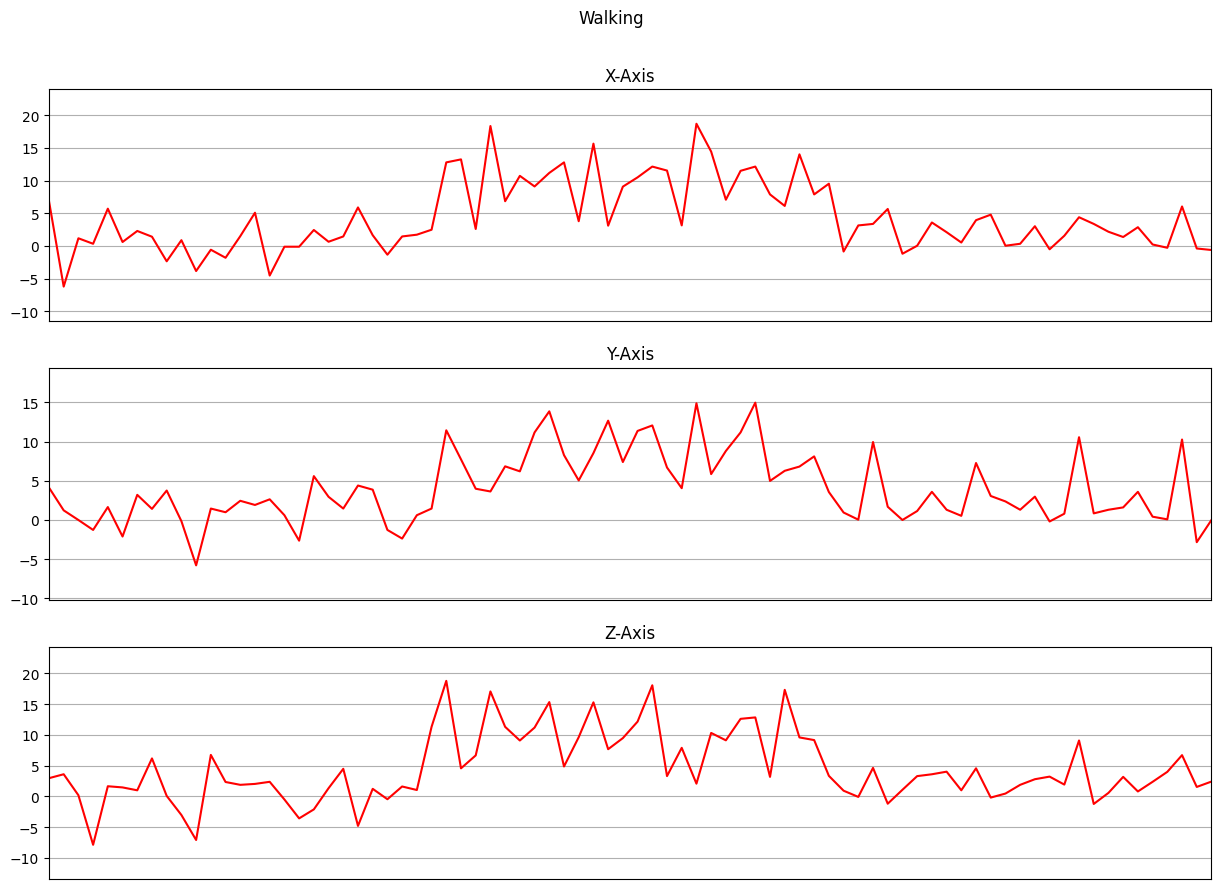

In [5]:
plot_activity(LABELS[np.argmax(y_train[idx])], x_train[idx])

# define functions

In [6]:
def absoulte(data):
    inputs = copy.deepcopy(data)
    outputs = copy.deepcopy(data)
    for i in range(len(inputs)):
        outputs[i] = np.sqrt(np.sum(np.square(inputs[i])))
    return outputs[:,0]

def low_pass_filter(data, cutoff_frequency=SAMPLING_RATE*2):
    inputs = copy.deepcopy(data)
    fft_signal = fft(inputs)
    frequencies = np.fft.fftfreq(len(inputs), 1 / SAMPLING_RATE)
    fft_signal[np.abs(frequencies) > cutoff_frequency] = 0
    return ifft(fft_signal).real

def difference(data):
    inputs = copy.deepcopy(data)
    outputs = copy.deepcopy(data)
    outputs[0] = 0
    for i in range(1, len(inputs)):
        outputs[i] = (inputs[i] - inputs[i-1])
    return outputs

def differential(data):
    inputs = copy.deepcopy(data)
    outputs = copy.deepcopy(data)
    outputs[0] = 0
    for i in range(1, len(inputs)):
        outputs[i] = (inputs[i] - inputs[i-1]) * SAMPLING_RATE
    return outputs

def integral(data):
    inputs = copy.deepcopy(data)
    outputs = copy.deepcopy(data)
    outputs[0] = 0
    for i in range(1, len(inputs)):
        outputs[i] = (outputs[i-1] + inputs[i]) / SAMPLING_RATE
    return outputs

# absolute

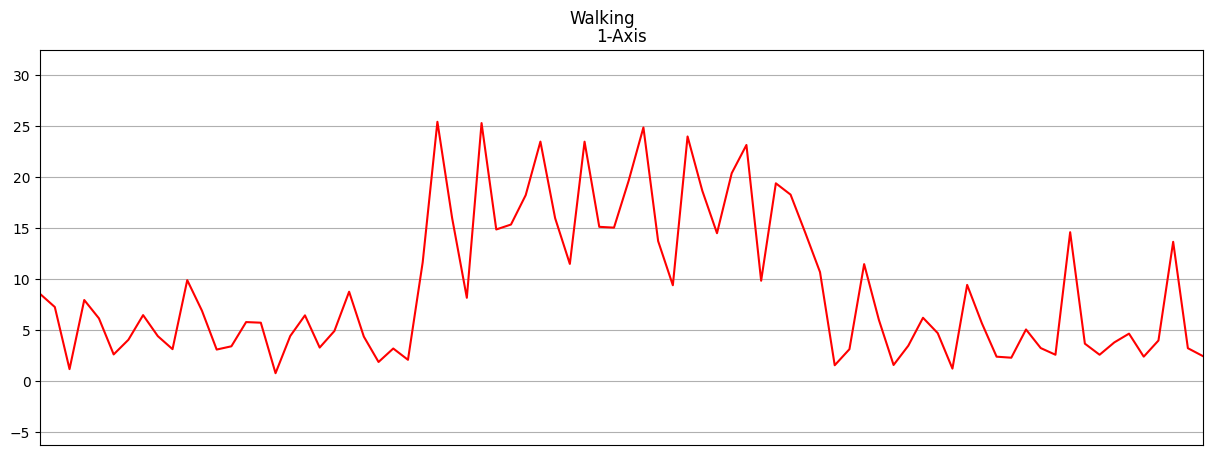

In [7]:
n_plot_activity(LABELS[np.argmax(y_train[idx])], absoulte(x_train[idx]))

# difference

In [24]:
sum_of_difference = dict(zip(["x","y","z"],sum(difference(x_train[idx]))))
for k, v in sum_of_difference.items():
    print(f"{k}: {v}")

x: -7.502912998199463
y: -4.1399993896484375
z: -0.549195408821106


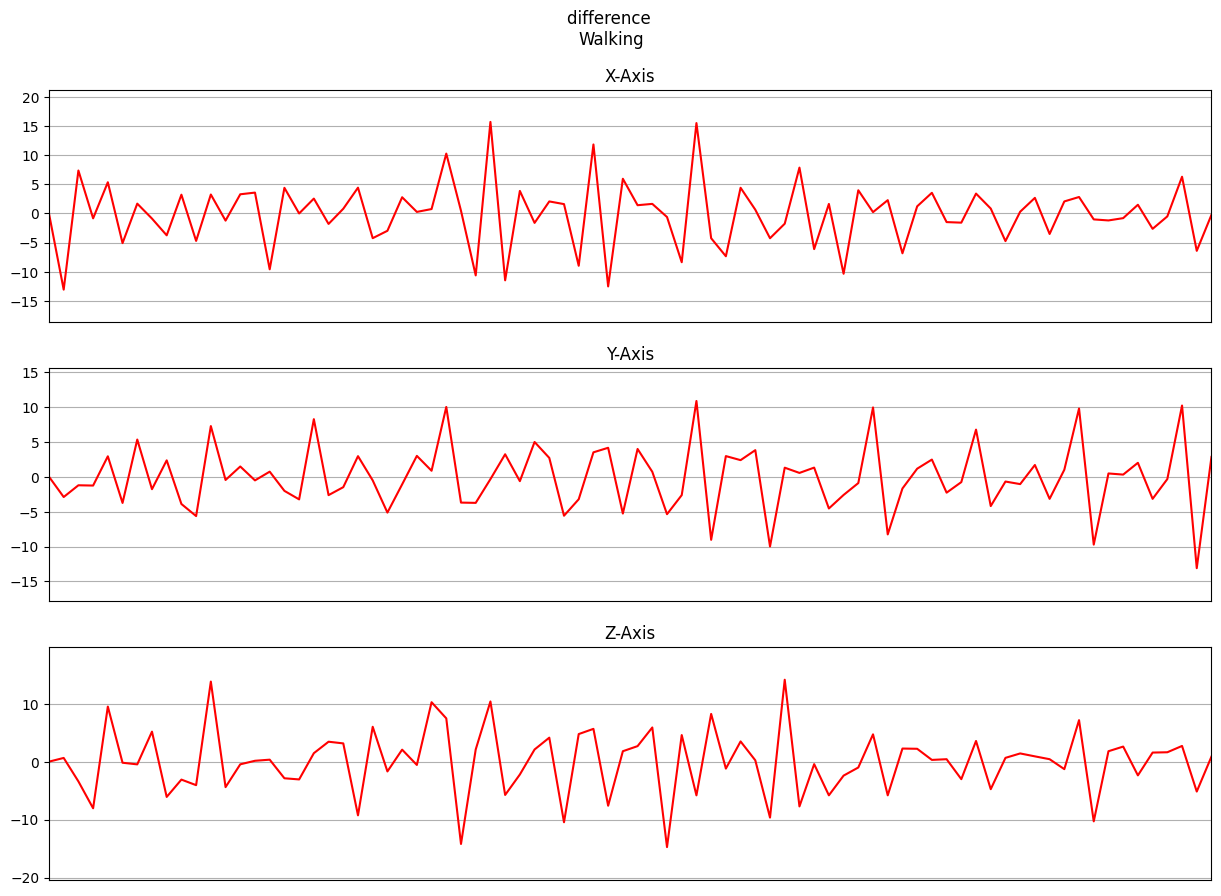

In [9]:
plot_activity(f"difference \n{LABELS[np.argmax(y_train[idx])]}", difference(x_train[idx]))

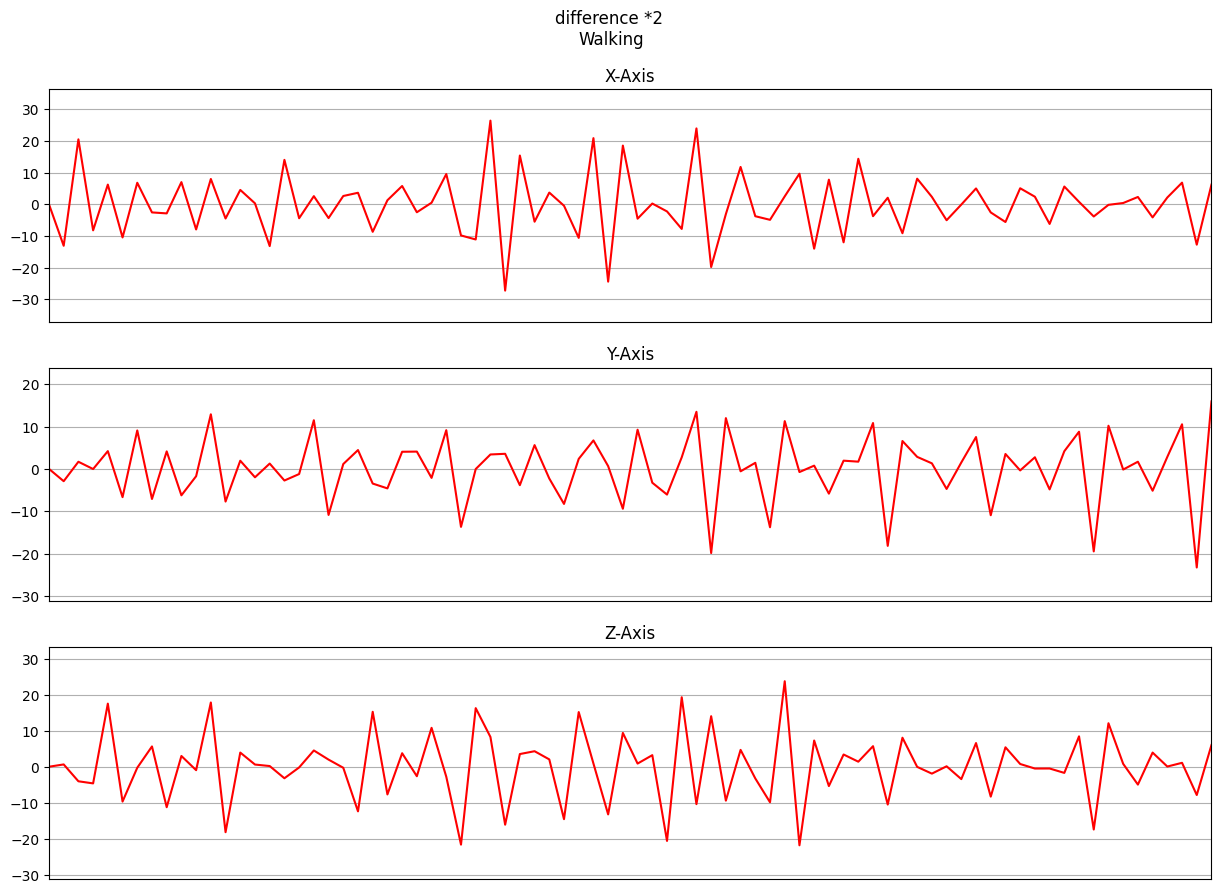

In [10]:
plot_activity(f"difference *2 \n{LABELS[np.argmax(y_train[idx])]}", difference(difference(x_train[idx])))

# differential

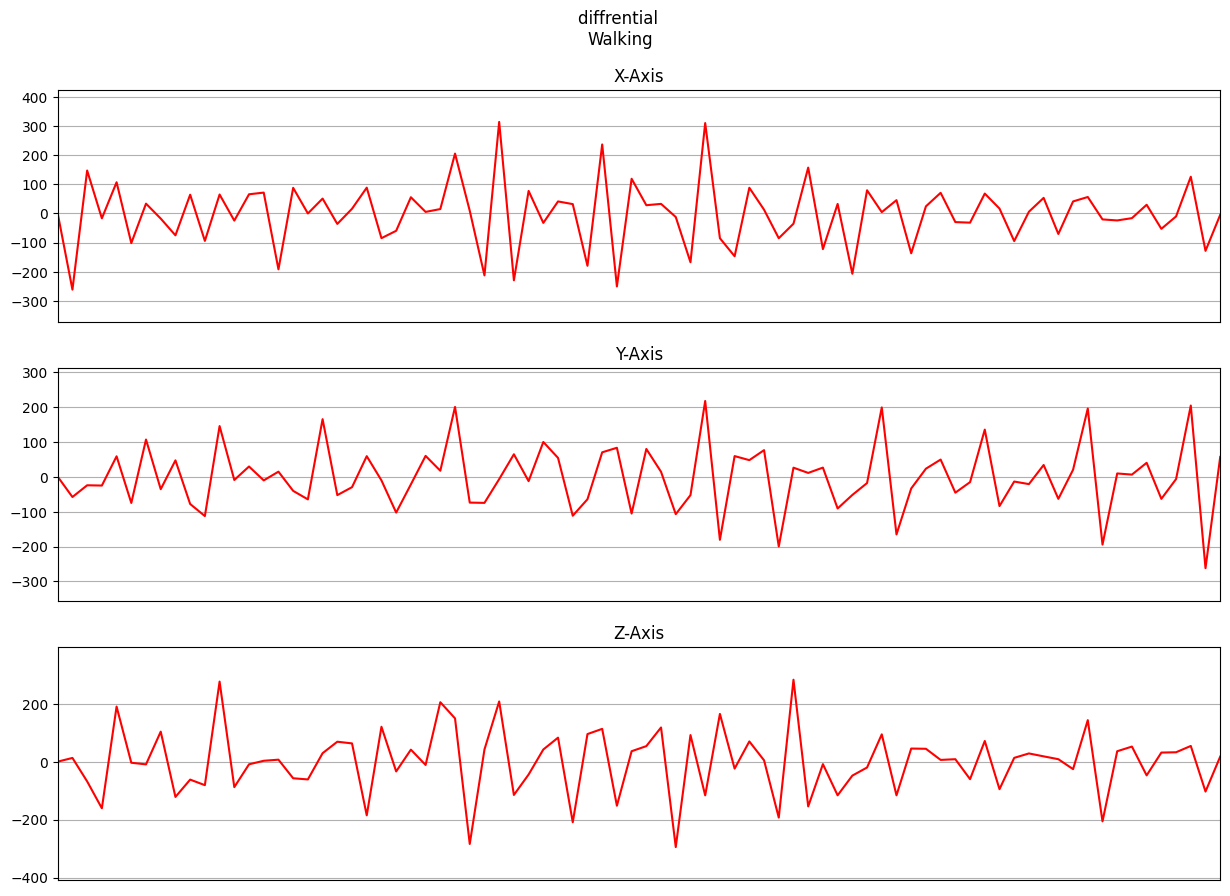

In [11]:
plot_activity(f"diffrential \n{LABELS[np.argmax(y_train[idx])]}", differential(x_train[idx]))

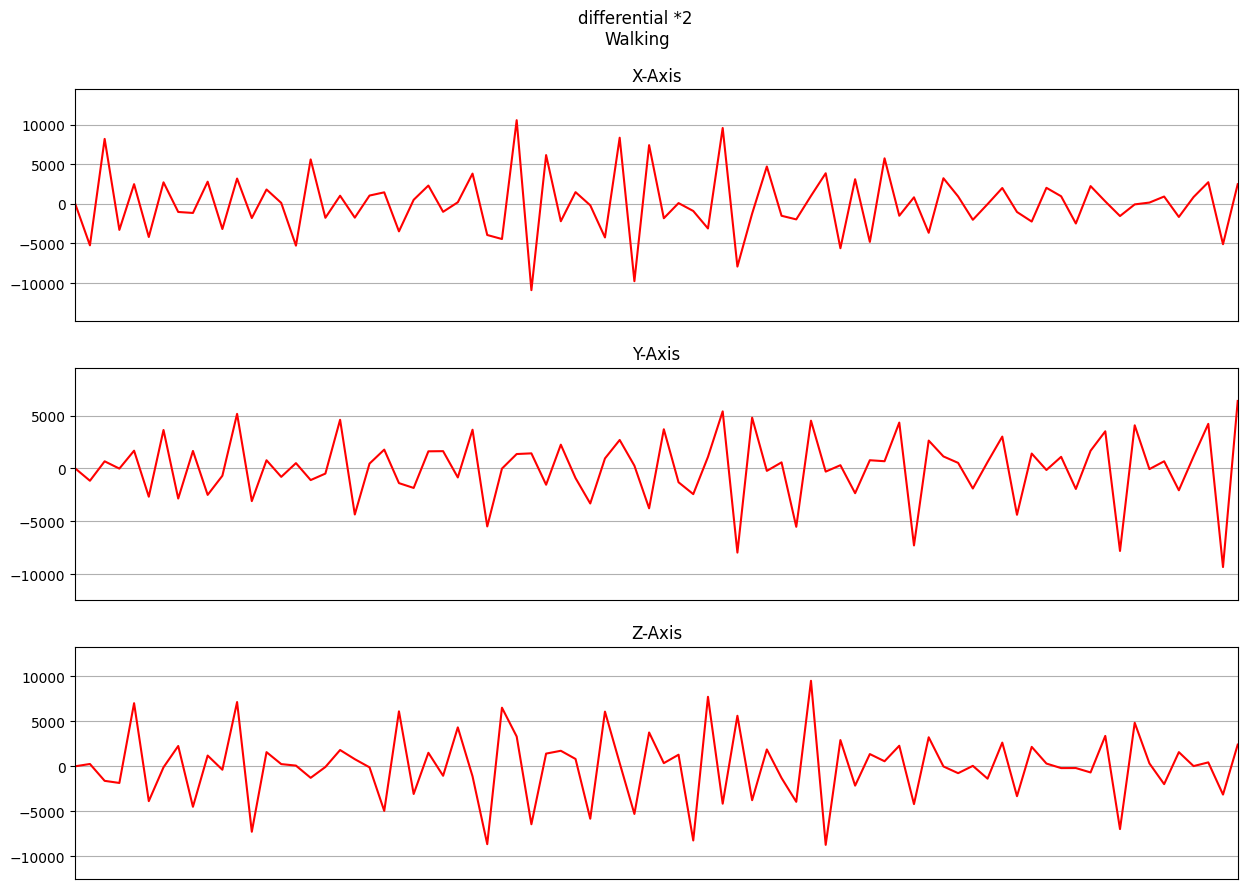

In [12]:
plot_activity(f"differential *2 \n{LABELS[np.argmax(y_train[idx])]}", differential(differential(x_train[idx])))

# low-pass filtered differential

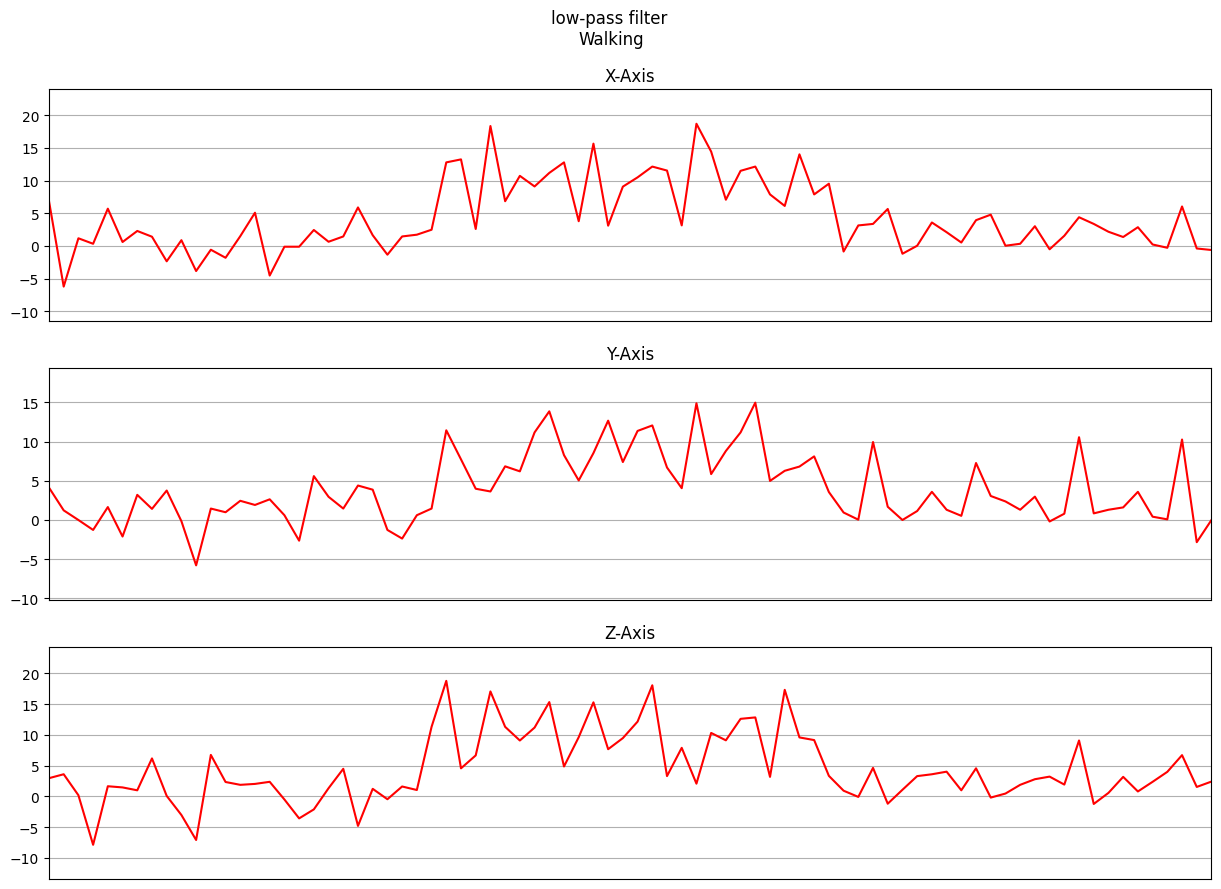

In [13]:
plot_activity(f"low-pass filter \n{LABELS[np.argmax(y_train[idx])]}", low_pass_filter(x_train[idx]))

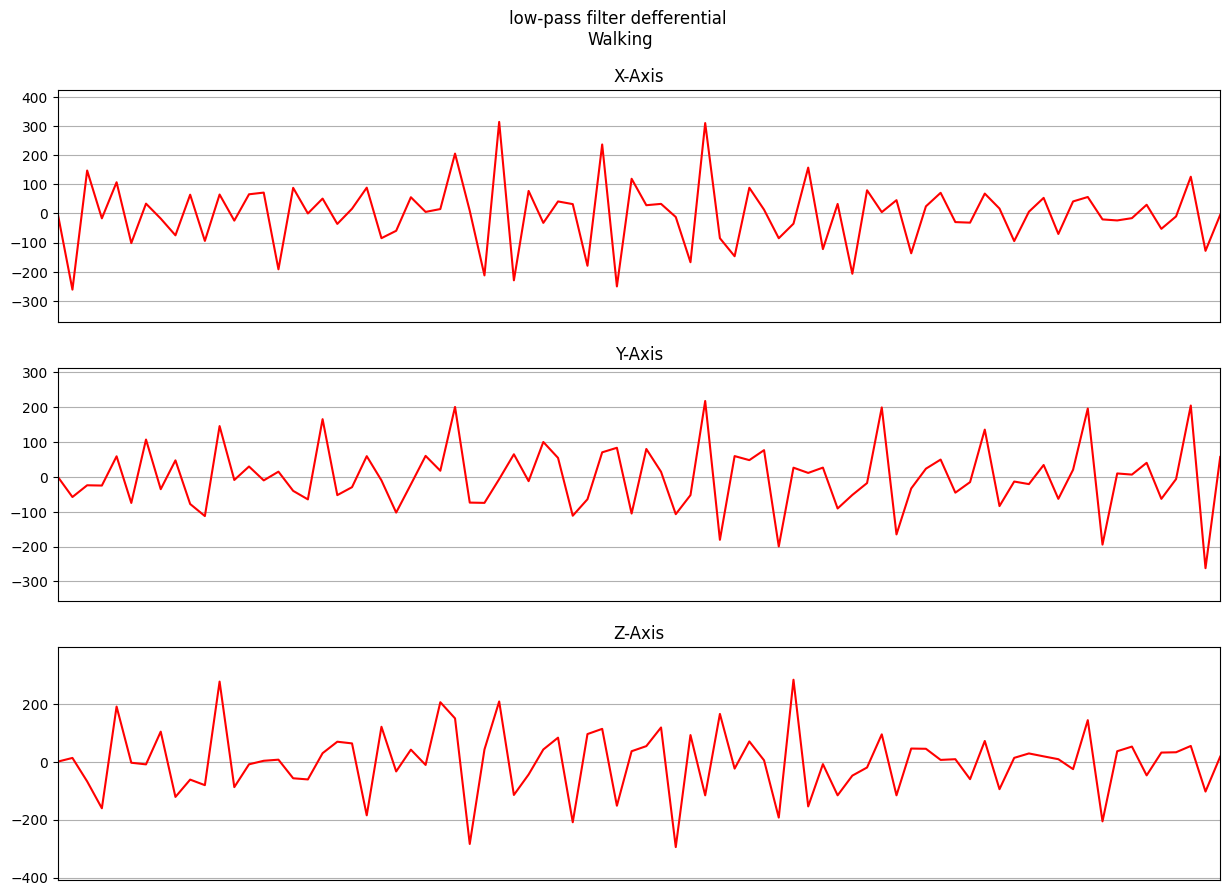

In [14]:
plot_activity(f"low-pass filter defferential \n{LABELS[np.argmax(y_train[idx])]}", differential(low_pass_filter(x_train[idx])))

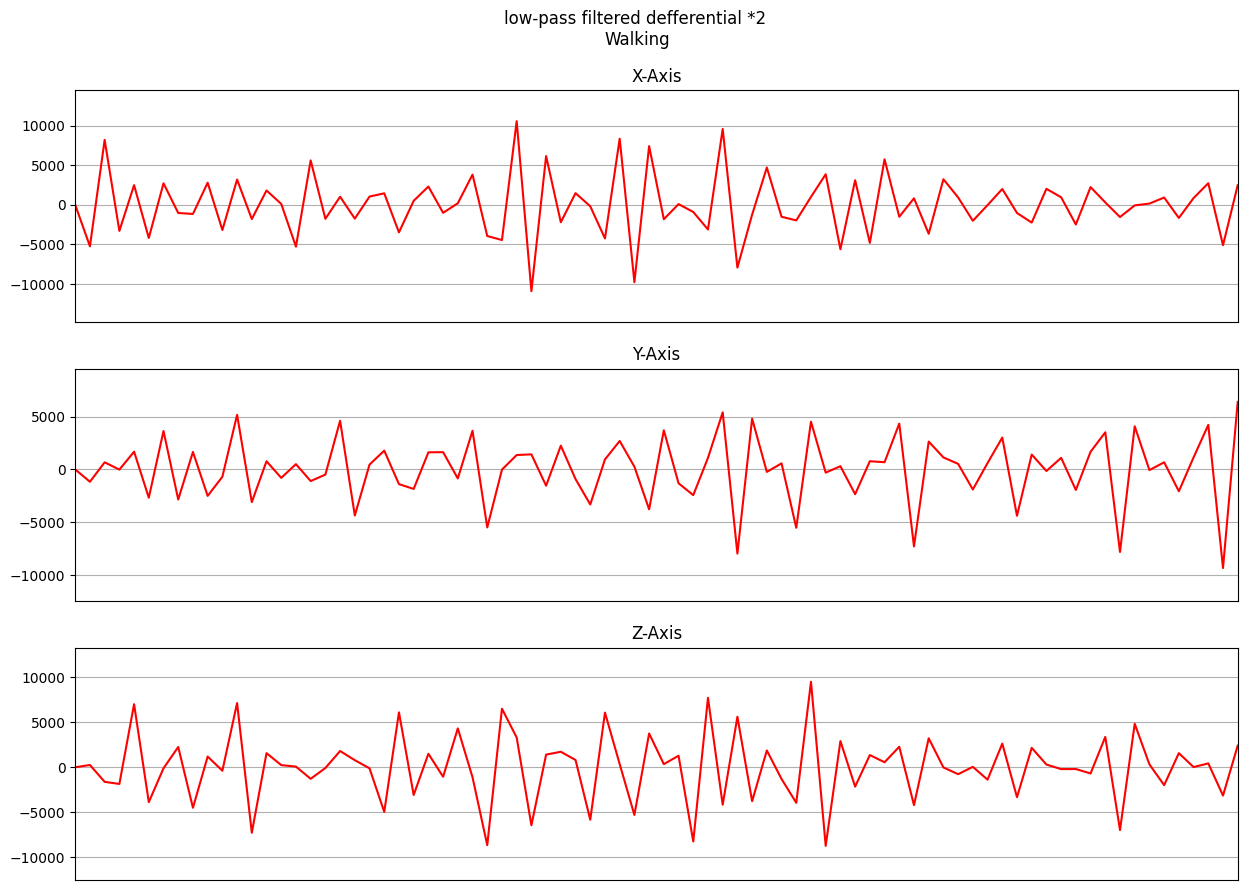

In [15]:
plot_activity(f"low-pass filtered defferential *2 \n{LABELS[np.argmax(y_train[idx])]}", differential(differential(low_pass_filter(x_train[idx]))))

# integral

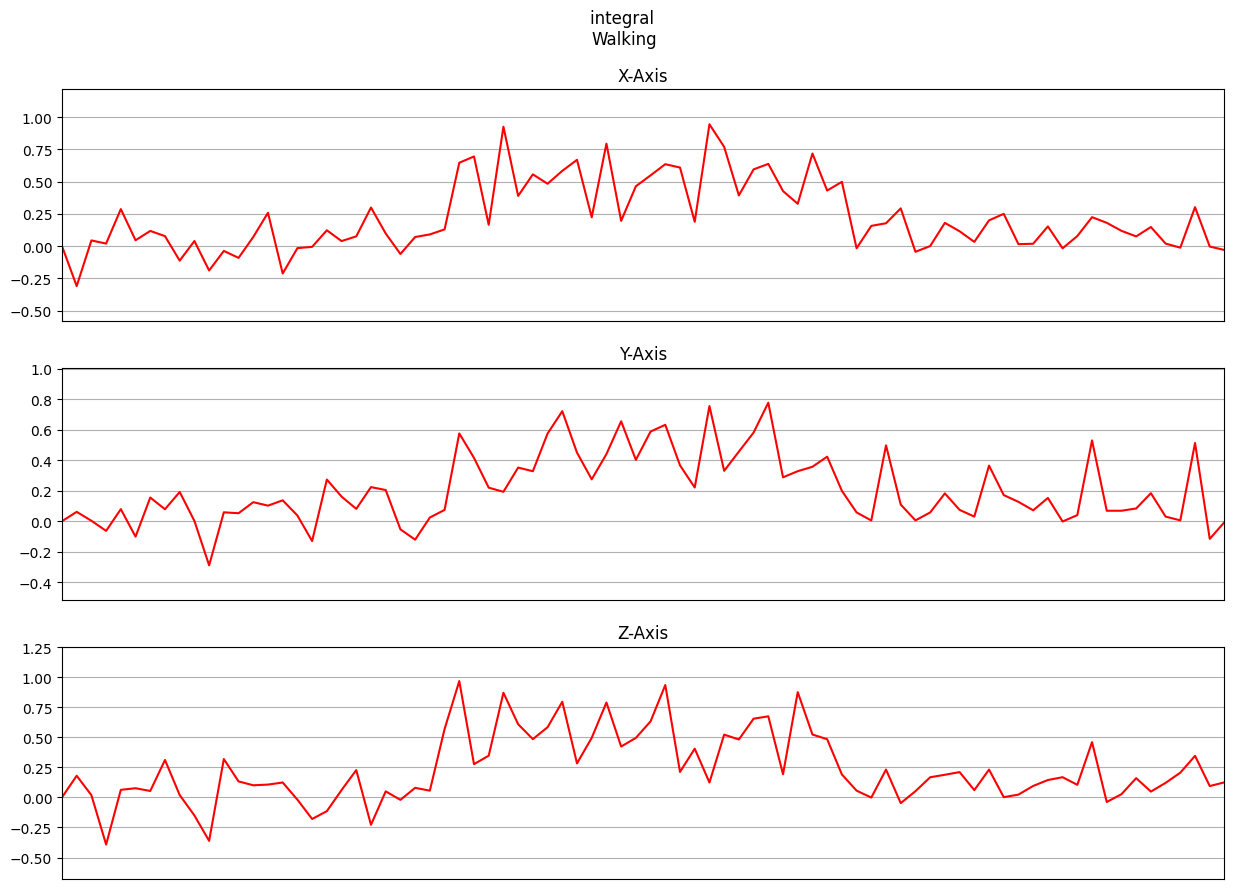

In [16]:
plot_activity(f"integral \n{LABELS[np.argmax(y_train[idx])]}", integral(x_train[idx]))

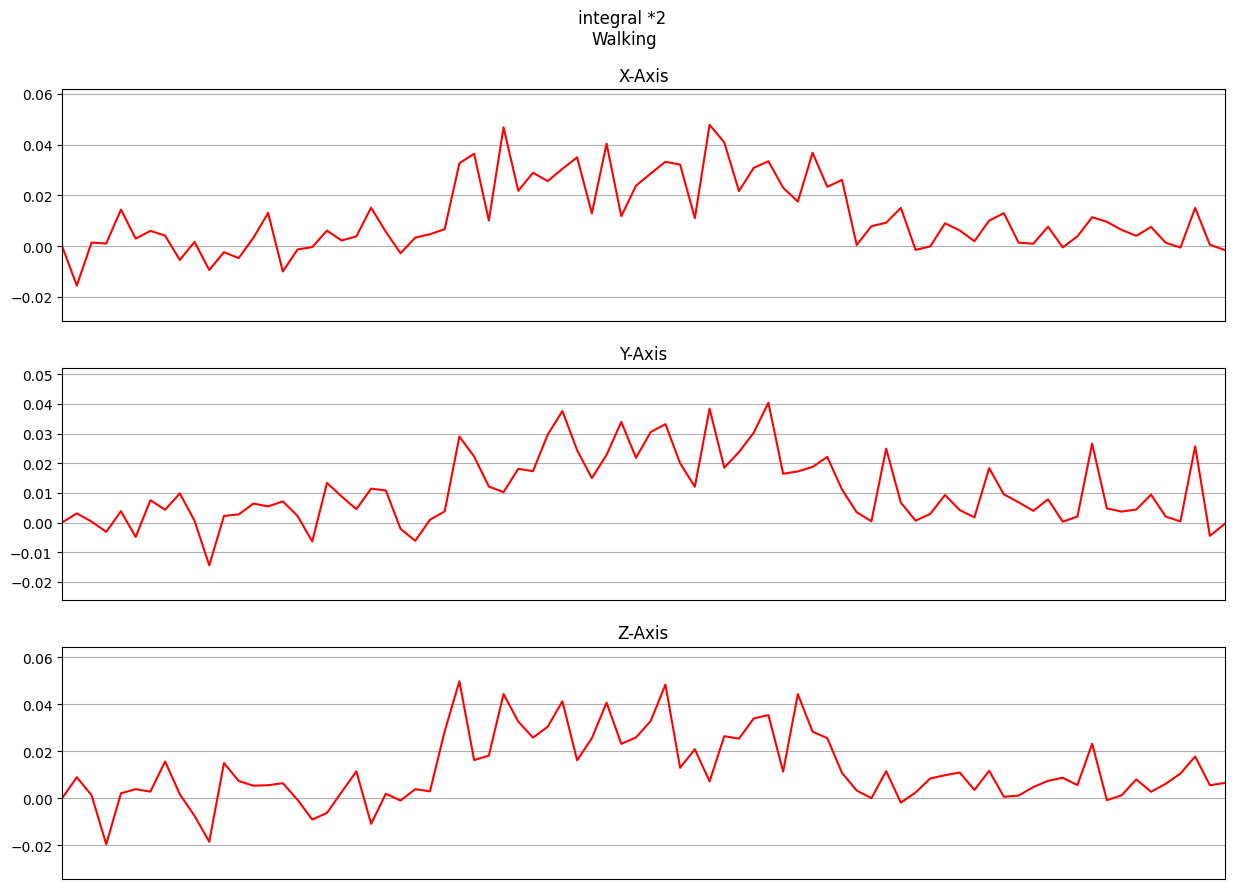

In [17]:
plot_activity(f"integral *2 \n{LABELS[np.argmax(y_train[idx])]}", integral(integral(x_train[idx])))

In [18]:
total = {
    'raw': x_train[idx],
    'abs': absoulte(x_train[idx]),
    'difference': difference(x_train[idx]),
    'difference2': difference(difference(x_train[idx])),
    'differential': differential(x_train[idx]),
    'differential2': differential(differential(x_train[idx])),
    'integral': integral(x_train[idx]),
    'integral2': integral(integral(x_train[idx])),
    'low_pass': low_pass_filter(x_train[idx]),
    'low_pass_differential': differential(low_pass_filter(x_train[idx])),
    'low_pass_differential2': differential(differential(low_pass_filter(x_train[idx]))),
}

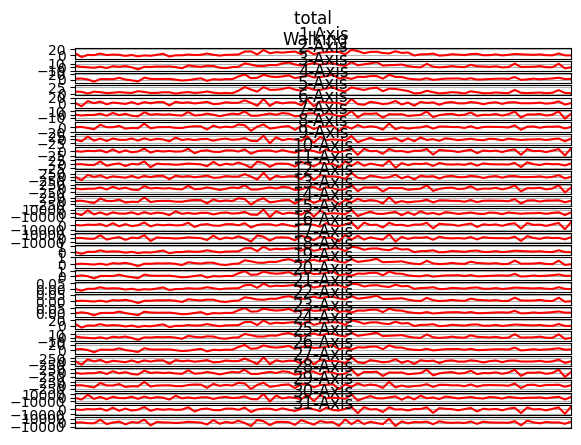

In [19]:
new_axis = list()
for key in total:
    if type(total[key][0])==np.ndarray:
        for i in range(total[key].shape[1]):
            new_axis.append(total[key][:,i])
    else:
        new_axis.append(total[key])
new_axis = np.array(new_axis).T
n_plot_activity(f"total \n{LABELS[np.argmax(y_train[idx])]}", new_axis)